In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [2]:
internet = pd.read_csv('dataset\\Internet-Demographic.csv')

In [3]:
internet

,Country Name,Country Code,Birth rate,Internet users,Income Group
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income
2,Angola,AGO,45.985,19.1,Upper middle income
3,Albania,ALB,12.877,57.2,Upper middle income
4,United Arab Emirates,ARE,11.044,88.0,High income
...,...,...,...,...,...
190,"Yemen, Rep.",YEM,32.947,20.0,Lower middle income
191,South Africa,ZAF,20.850,46.5,Upper middle income
192,"Congo, Dem. Rep.",COD,42.394,2.2,Low income
193,Zambia,ZMB,40.471,15.4,Lower middle income


<h1>1.) Distribution of Birth Rate.</h1>

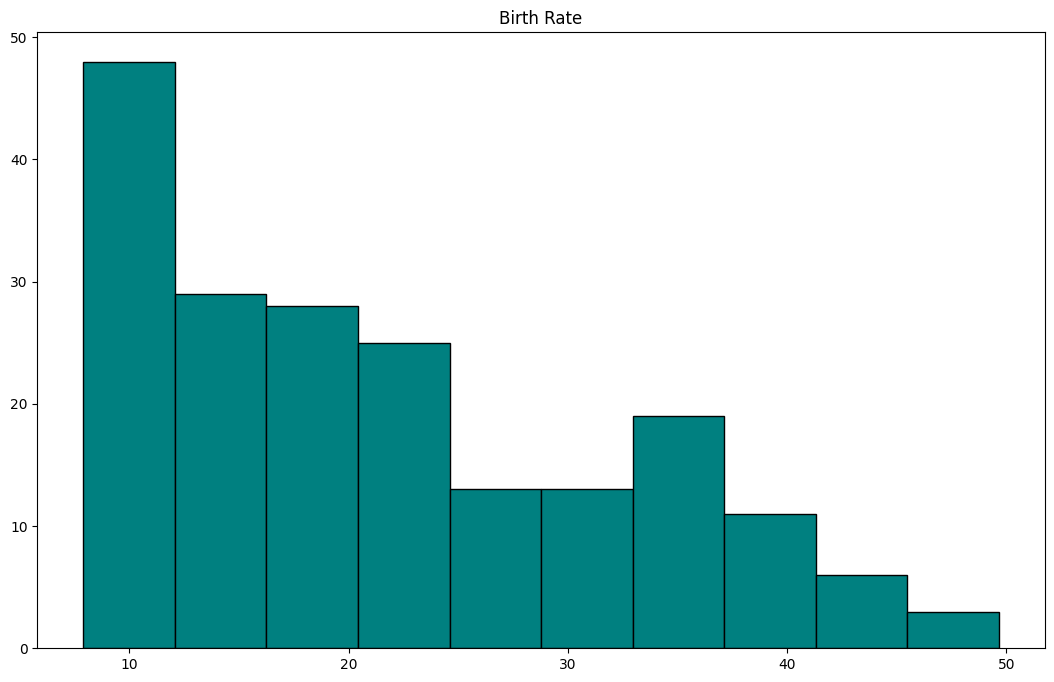

In [17]:
plt.hist(internet['Birth rate'],bins=10,color='Teal',edgecolor='black')
plt.title('Birth Rate')
plt.gcf().set_size_inches(13,8)
plt.show()

<h1>2.) Top 5 countries with the highest internet usage.</h1>

In [27]:
countries_internet = internet.groupby('Country Name')['Internet users'].sum().reset_index()
top5_countries_internet = countries_internet.nlargest(5,'Internet users')
top5_countries_internet

,Country Name,Internet users
79,Iceland,96.5468
19,Bermuda,95.3000
131,Norway,95.0534
167,Sweden,94.7836
48,Denmark,94.6297


<h1>3.) Count of Countries by Income Group.</h1>

In [128]:
countries_income

Income Group
High income            67
Low income             30
Lower middle income    50
Upper middle income    48
Name: Country Name, dtype: int64

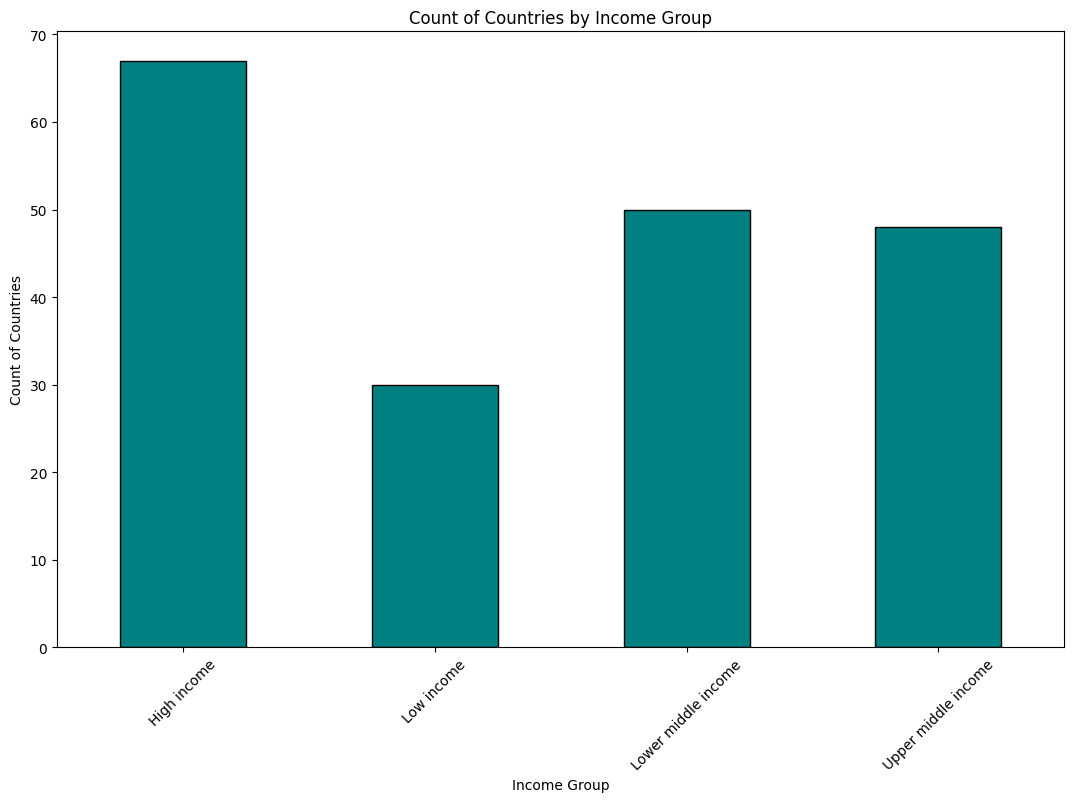

In [51]:
countries_income = internet.groupby('Income Group')['Country Name'].count()
countries_income.plot(kind='bar',color='teal', edgecolor='black')
plt.gcf().set_size_inches(13,8)
plt.title('Count of Countries by Income Group')
plt.ylabel('Count of Countries')
plt.xticks(rotation=45)
plt.show()

<h1>4.) Box plot of internet usage.</h1>

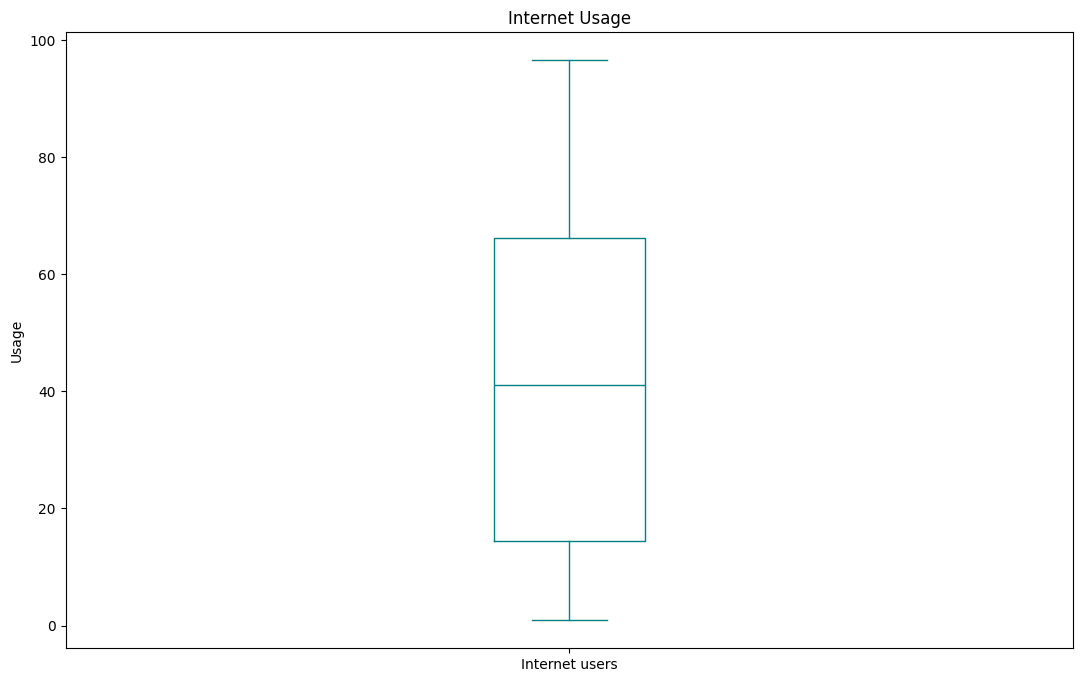

In [58]:
int_usage = internet['Internet users']
int_usage.plot(kind='box',color='teal')
plt.gcf().set_size_inches(13,8)
plt.title('Internet Usage')
plt.ylabel('Usage')
plt.show()

<h1>5.) Countries with no Internet Access.</h1>

In [78]:
no_net_countries = internet[internet['Internet users'] == 0].count().reset_index(name='Count of users')
no_net_countries

,index,Count of users
0,Country Name,0
1,Country Code,0
2,Birth rate,0
3,Internet users,0
4,Income Group,0


<h1>6.) Average Birthrate</h1>

In [92]:
ave_birth = internet['Birth rate'].mean()
ave_birth

np.float64(21.469928205128202)

<h1>7.) Scatterplot: Birth Rate vs Internet Usage</h1>

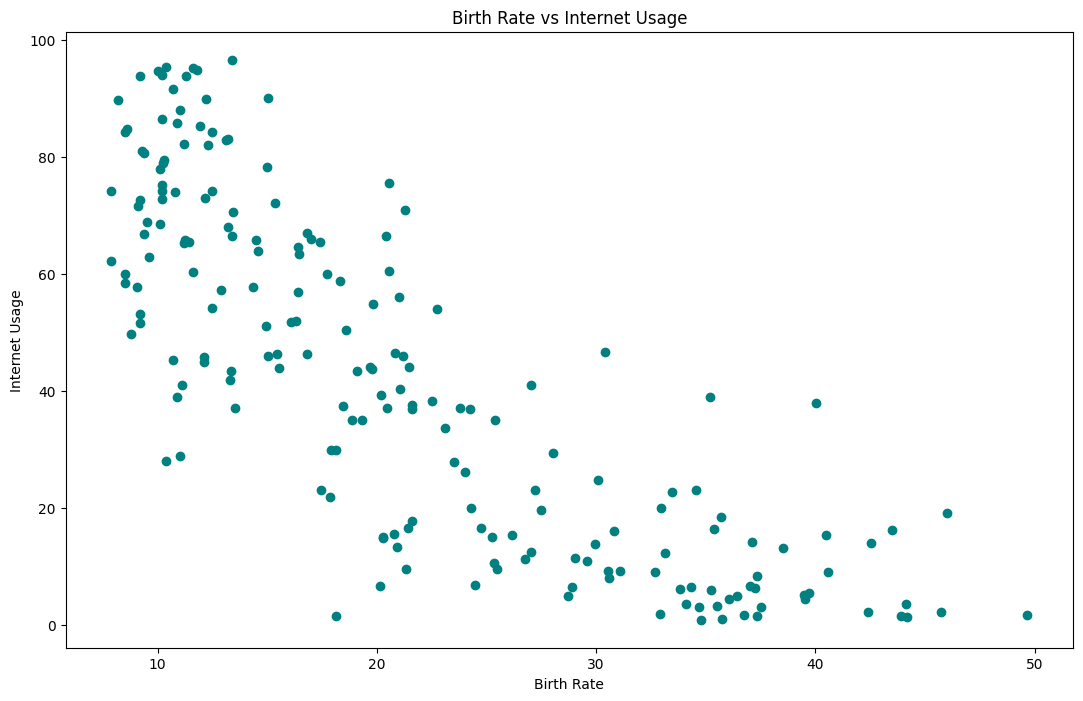

In [102]:
plt.scatter(internet['Birth rate'], internet['Internet users'],color='teal')
plt.title('Birth Rate vs Internet Usage')
plt.xlabel('Birth Rate')
plt.ylabel('Internet Usage')
plt.gcf().set_size_inches(13,8)
plt.show()

<h1>8.) Countries with Birth Rate above 40.</h1>

In [108]:
birth_40 = internet[internet['Birth rate'] > 40]
country_40 = birth_40.groupby('Country Name')['Birth rate'].sum().reset_index()
country_40

,Country Name,Birth rate
0,Angola,45.985
1,Burkina Faso,40.551
2,Burundi,44.151
3,Chad,45.745
4,"Congo, Dem. Rep.",42.394
5,"Gambia, The",42.525
6,Mali,44.138
7,Niger,49.661
8,Nigeria,40.045
9,Somalia,43.891


<h1>9.) Pie Chart of Income Groups.</h1>

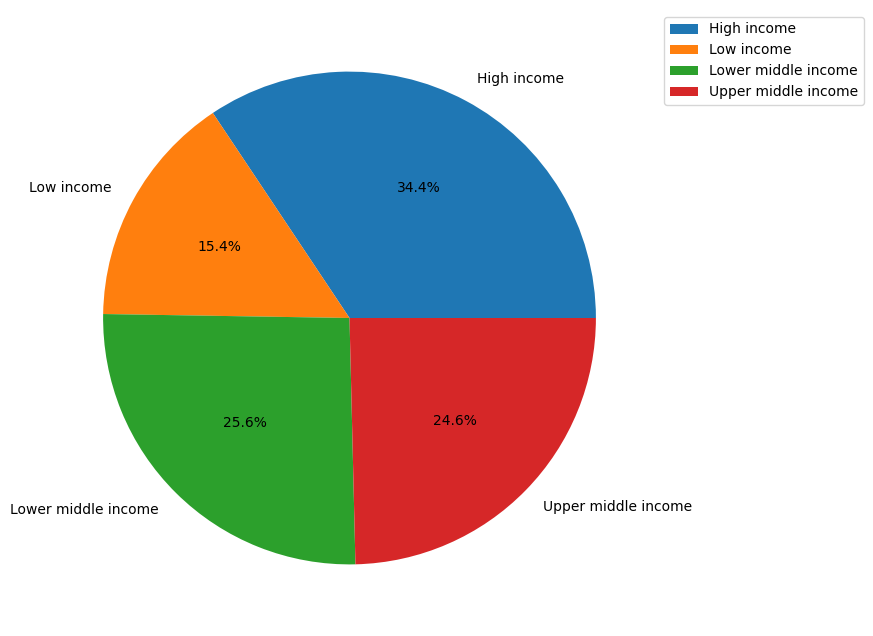

In [126]:
country_income = internet.groupby('Income Group')['Country Name'].count()
plt.pie(country_income, labels = country_income.index, autopct= '%1.1f%%')
plt.gcf().set_size_inches(13,8)
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

<h1>10.) Correlation between Birth Rate and Internet users.</h1>

In [127]:
birth_internet = internet['Birth rate'].corr(internet['Internet users'])
birth_internet

np.float64(-0.8155885551284763)